___
# Ciência dos Dados - PROJETO 1

# Renan Cabral
___

___
## Introdução

Ao longo desta projeto de análise do banco de dados da PNAD serão análisados os dados de acessibilidade à internet e acesso a banda larga em certas regiões como São Paulo e Maranhão e analisar seu avanço, dados outros fatores que possam afetar e presença deste (acessibilidade e banda larga). 

In [20]:
# São Paulo é o estado mais rico do Brasil, estando em situação oposta a este temos o Maranhão.
# Sendo assim serão comparados primariamente entre estes dois as questões de acessibilidade à internet e a banda larga
# ficando clara uma análise de como o PIB e a renda média de uma região afeta a presença de acesso a internet e banda larag.

In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [22]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Renan Cabral\Documents\GitHub\Ci-ncia_dos_dados_2017


In [23]:
dados=pd.read_csv('DOM2015csv.zip',sep=',')
dados_geral=pd.read_csv('DOM2015csv.zip',sep=',')

In [24]:
dados

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V4611,V4614,UPA,V4617,V4618,V4620,V4621,V4622,V4624,V9992
0,0,2015,11,15,1,1,1.0,1.0,1.0,4.0,...,270.0,8.000000e+02,191,110001,1,1.0,8.000000e+02,4.0,1.0,20161104
1,1,2015,11,15,2,6,NaN,NaN,NaN,NaN,...,NaN,NaN,191,110001,1,NaN,NaN,NaN,NaN,20161104
2,2,2015,11,15,3,1,1.0,1.0,1.0,4.0,...,270.0,1.150000e+03,191,110001,1,1.0,1.150000e+03,4.0,1.0,20161104
3,3,2015,11,15,4,1,6.0,4.0,1.0,2.0,...,270.0,4.760000e+03,191,110001,1,6.0,7.930000e+02,4.0,2.0,20161104
4,4,2015,11,15,5,1,2.0,2.0,1.0,2.0,...,271.0,5.800000e+03,191,110001,1,2.0,2.900000e+03,6.0,2.0,20161104
5,5,2015,11,15,6,1,1.0,1.0,1.0,2.0,...,270.0,1.990000e+03,191,110001,1,1.0,1.990000e+03,5.0,1.0,20161104
6,6,2015,11,15,7,1,2.0,2.0,1.0,2.0,...,270.0,7.000000e+02,191,110001,1,2.0,3.500000e+02,2.0,1.0,20161104
7,7,2015,11,15,8,1,3.0,2.0,1.0,2.0,...,270.0,4.000000e+03,191,110001,1,3.0,1.333000e+03,4.0,1.0,20161104
8,8,2015,11,15,9,1,5.0,4.0,1.0,2.0,...,271.0,4.090000e+03,191,110001,1,5.0,8.180000e+02,4.0,1.0,20161104
9,9,2015,11,15,10,6,NaN,NaN,NaN,NaN,...,NaN,NaN,191,110001,1,NaN,NaN,NaN,NaN,20161104


In [25]:
dados.UF

dados=dados[(dados.UF==35) | (dados.UF==21)]
dados.shape


(20517, 81)

In [26]:
#dados Brasil inteiro:

dados_geral.V02322=dados_geral.V02322.astype("category") #acesso no próprio domicílio
dados_geral.V02322.cat.categories=(['Sim', 'Não'])

dados_geral.V02323=dados_geral.V02323.astype("category") #acesso por microcomputador
dados_geral.V02323.cat.categories=(['Sim', 'Não'])

dados_geral.V02324=dados_geral.V02324.astype("category") #acesso por telefone
dados_geral.V02324.cat.categories=(['Sim', 'Não'])

dados_geral.V02325=dados_geral.V02325.astype("category") #acesso por tablet
dados_geral.V02325.cat.categories=(['Sim', 'Não'])

dados_geral.V02326=dados_geral.V02326.astype("category") #acesso pela TV
dados_geral.V02326.cat.categories=(['Sim', 'Não'])

dados_geral.V02327=dados_geral.V02327.astype("category") #acesso por outras formas
dados_geral.V02327.cat.categories=(['Sim', 'Não'])

dados_geral.V02424=dados_geral.V02424.astype("category") #acesso através de rede celular 
dados_geral.V02424.cat.categories=(['Sim', 'Não'])

dados_geral.V02425=dados_geral.V02425.astype("category") #acesso por linha telefônica
dados_geral.V02425.cat.categories=(['Sim', 'Não'])

dados_geral.V02426=dados_geral.V02426.astype("category") #acesso de banda larga 
dados_geral.V02426.cat.categories=(['Sim', 'Não'])


dados_geral.UF=dados_geral.UF.astype("category") #estados do Brasil
dados_geral.UF.cat.categories=(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'])


In [27]:
dados_filt=pd.DataFrame()

dados_t=dados_geral[(dados_geral.V02426.notnull()) & (dados_geral.V4105.notnull()) & (dados_geral.V02425.notnull()) & (dados_geral.V02424.notnull()) & (dados_geral.V02327.notnull()) & (dados_geral.V02326.notnull()) & (dados_geral.V02325.notnull()) & (dados_geral.V02324.notnull())  & (dados_geral.V02323.notnull())  & (dados_geral.V02322.notnull())]

#Criando colunas:
dados_filt["acesso_a_banda_larga"]=dados_t.V02426
dados_filt["acesso_no_domicilio"]=dados_t.V02322
dados_filt["acesso por telefone"]=dados_t.V02324
dados_filt["estado"]=dados_geral.UF


dados_filt.loc[(dados_geral.V02426=='Sim') | (dados_geral.V02425=='Sim') | (dados_geral.V02424=='Sim') | (dados_geral.V02327=='Sim') | (dados_geral.V02326=='Sim') | (dados_geral.V02325=='Sim') | (dados_geral.V02324=='Sim') | (dados_geral.V02323=='Sim') | (dados_geral.V02322=='Sim'), 'acesso_a_internet']='possuí'
dados_filt.loc[(dados_geral.V02426=='Não') & (dados_geral.V02425=='Não') &  (dados_geral.V02424=='Não') &  (dados_geral.V02327=='Não') &  (dados_geral.V02326=='Não') &  (dados_geral.V02325=='Não') &  (dados_geral.V02324=='Não') &  (dados_geral.V02323=='Não') &  (dados_geral.V02322=='Não'), 'acesso_a_internet']='não possuí'

dados_filt.loc[(dados_geral.UF=="São Paulo") | (dados_geral.UF=="Rio de Janeiro") | (dados_geral.UF=="Espírito Santo") | (dados_geral.UF=="Minas Gerais") ,"Região"]="Sudeste"
dados_filt.loc[(dados_geral.UF=="Amazonas") | (dados_geral.UF=="Pará") | (dados_geral.UF=="Amapá") | (dados_geral.UF=="Tocantis") | (dados_geral.UF=="Rondônia") | (dados_geral.UF=="Roraima") |  (dados_geral.UF=="Acre"),"Região"]="Norte"
dados_filt.loc[(dados_geral.UF=="Bahia") | (dados_geral.UF=="Piauí") | (dados_geral.UF=="Maranhão") | (dados_geral.UF=="Ceará") | (dados_geral.UF=="Paraíba") | (dados_geral.UF=="Pernambuco") | (dados_geral.UF=="Alagoas") | (dados_geral.UF=="Sergipe") | (dados_geral.UF=="Rio Grande do Norte"),"Região"]="Nordeste"
dados_filt.loc[(dados_geral.UF=="Mato Grosso") | (dados_geral.UF=="Goiás") | (dados_geral.UF=="Mato Grosso do Sul") | (dados_geral.UF=="Distrito Federal") ,"Região"]="Centro-Oeste"
dados_filt.loc[(dados_geral.UF=="Rio Grande do Sul") | (dados_geral.UF=="Santa Catarina") | (dados_geral.UF=="Paraná") ,"Região"]="Sul"


#plots:
acesso_domiciliar=dados_filt.acesso_no_domicilio.value_counts(sort=False)

dados_filt


,acesso_a_banda_larga,acesso_no_domicilio,acesso por telefone,estado,acesso_a_internet,Região
2,Sim,Sim,Não,Rondônia,possuí,Norte
3,Sim,Sim,Sim,Rondônia,possuí,Norte
5,Sim,Sim,Não,Rondônia,possuí,Norte
8,Sim,Sim,Sim,Rondônia,possuí,Norte
10,Sim,Sim,Sim,Rondônia,possuí,Norte
11,Sim,Sim,Sim,Rondônia,possuí,Norte
13,Sim,Sim,Sim,Rondônia,possuí,Norte
15,Sim,Sim,Sim,Rondônia,possuí,Norte
17,Sim,Sim,Sim,Rondônia,possuí,Norte
18,Sim,Sim,Sim,Rondônia,possuí,Norte


In [28]:
#cruzar acesso a banda larga com região


In [29]:
# Separação entre pesquisa geral no país

In [30]:
dados.V02322=dados.V02322.astype("category") #acesso no próprio domicílio
dados.V02322.cat.categories=(['Sim', 'Não'])

dados.V02323=dados.V02323.astype("category") #acesso por microcomputador
dados.V02323.cat.categories=(['Sim', 'Não'])

dados.V02324=dados.V02324.astype("category") #acesso por telefone
dados.V02324.cat.categories=(['Sim', 'Não'])

dados.V02325=dados.V02325.astype("category") #acesso por tablet
dados.V02325.cat.categories=(['Sim', 'Não'])

dados.V02326=dados.V02326.astype("category") #acesso pela TV
dados.V02326.cat.categories=(['Sim', 'Não'])

dados.V02327=dados.V02327.astype("category") #acesso por outras formas
dados.V02327.cat.categories=(['Sim', 'Não'])

dados.V02424=dados.V02424.astype("category") #acesso através de rede celular 
dados.V02424.cat.categories=(['Sim', 'Não'])

dados.V02425=dados.V02425.astype("category") #acesso por linha telefônica
dados.V02425.cat.categories=(['Sim', 'Não'])

dados.V02426=dados.V02426.astype("category") #acesso de banda larga 
dados.V02426.cat.categories=(['Sim', 'Não'])



C:\Users\Renan Cabral\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [31]:
dados_filtrado=pd.DataFrame()

dados_temp=dados[(dados.V02426.notnull()) & (dados.V4105.notnull()) & (dados.V02425.notnull()) & (dados.V02424.notnull()) & (dados.V02327.notnull()) & (dados.V02326.notnull()) & (dados.V02325.notnull()) & (dados.V02324.notnull())  & (dados.V02323.notnull())  & (dados.V02322.notnull())]

dados_filtrado["acesso_a_banda_larga"]=dados_temp.V02426
dados_filtrado["acesso_no_domicilio"]=dados_temp.V02322
dados_filtrado["acesso por telefone"]=dados_temp.V02324


dados_filtrado.loc[(dados.V02426=='Sim') | (dados.V02425=='Sim') | (dados.V02424=='Sim') | (dados.V02327=='Sim') | (dados.V02326=='Sim') | (dados.V02325=='Sim') | (dados.V02324=='Sim') | (dados.V02323=='Sim') | (dados.V02322=='Sim'), 'acesso_a_internet']='possuí'
dados_filtrado.loc[(dados.V02426=='Não') & (dados.V02425=='Não') &  (dados.V02424=='Não') &  (dados.V02327=='Não') &  (dados.V02326=='Não') &  (dados.V02325=='Não') &  (dados.V02324=='Não') &  (dados.V02323=='Não') &  (dados.V02322=='Não'), 'acesso_a_internet']='não possuí'

dados_filtrado.loc[(dados.UF==35), 'Região']="São Paulo"
dados_filtrado.loc[(dados.UF==21), 'Região']="Maranhão"


#plots:
banda_larga=dados_filtrado.acesso_a_banda_larga.value_counts(sort=False)

acesso_geral=dados_filtrado.acesso_a_internet.value_counts(sort=False)

acesso_domiciliar=dados_filtrado.acesso_no_domicilio.value_counts(sort=False)
# banda larga em SP:
banda_larga_SP=dados_filtrado.acesso_a_banda_larga[(dados_filtrado.Região=="São Paulo")].value_counts(sort=False)
#banda larga no Amazonas:
banda_larga_MA=dados_filtrado.acesso_a_banda_larga[(dados_filtrado.Região=="Maranhão")].value_counts(sort=False)


dados_filtrado

,acesso_a_banda_larga,acesso_no_domicilio,acesso por telefone,acesso_a_internet,Região
21444,Não,Sim,Sim,possuí,Maranhão
21448,Não,Sim,Sim,possuí,Maranhão
21451,Não,Sim,Sim,possuí,Maranhão
21452,Sim,Sim,Sim,possuí,Maranhão
21455,Não,Sim,Sim,possuí,Maranhão
21456,Não,Sim,Sim,possuí,Maranhão
21466,Não,Sim,Sim,possuí,Maranhão
21467,Não,Sim,Sim,possuí,Maranhão
21484,Não,Sim,Sim,possuí,Maranhão
21485,Não,Sim,Sim,possuí,Maranhão


In [32]:
print("frequência absoluta de acesso à banda larga em SP")
banda_larga_SP=dados_filtrado.acesso_a_banda_larga[(dados_filtrado.Região=="São Paulo")].value_counts(sort=False)
print(banda_larga_SP, '\n')


frequência absoluta de acesso à banda larga em SP
Sim    7522
Não    2091
Name: acesso_a_banda_larga, dtype: int64 



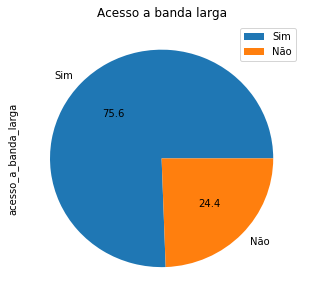

In [33]:
banda_larga=dados_filtrado.acesso_a_banda_larga.value_counts(sort=False)

plot=banda_larga.plot(kind='pie', title='Acesso a banda larga',legend=("possuí","não possuí"),autopct='%.1f',figsize=(5,5))

#função plt.subplot serve para colocar vários gráficos
#na mesma imagem para fins de comporação.

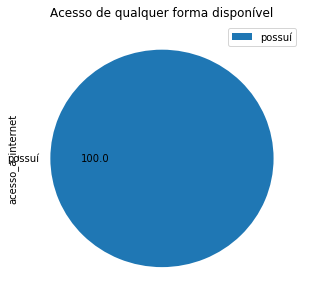

In [34]:
plot=acesso_geral.plot(kind='pie', title='Acesso de qualquer forma disponível',legend=("possuí","não possuí"),autopct='%.1f',figsize=(5,5))

# 100% das pessoas possui acesso à internet de alguma forma.

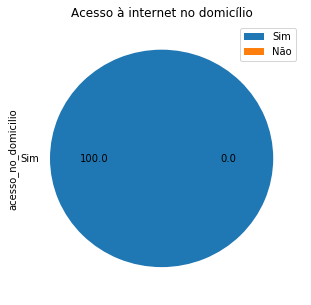

In [35]:
plot=acesso_domiciliar.plot(kind='pie', title='Acesso à internet no domicílio',legend=("possuí","não possuí"),autopct='%.1f',figsize=(5,5))

# 100% dos pesquisados possuem acesso à internet em seus domicílios.

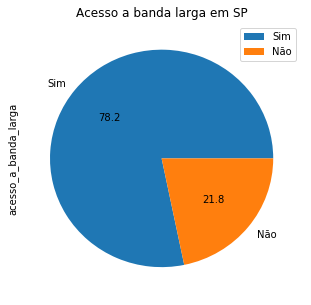

In [36]:
plot=banda_larga_SP.plot(kind='pie', title='Acesso a banda larga em SP',legend=("possuí","não possuí"),autopct='%.1f',figsize=(5,5))

#acesso a banda larga em SP

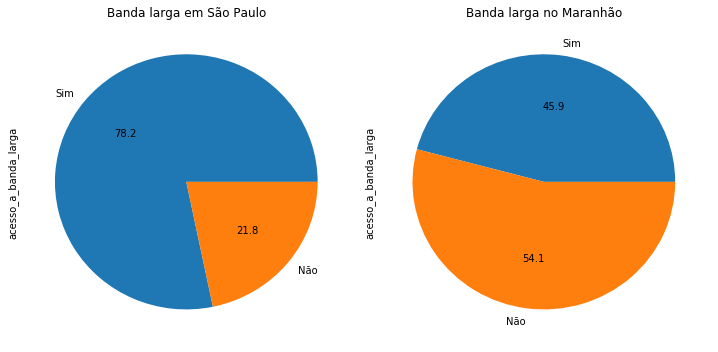

In [37]:
fig = plt.figure(figsize=(15,5))

plt.subplot(131)
plot = banda_larga_SP.plot(kind='pie',title='Banda larga em São Paulo',autopct='%.1f')

plt.subplot(132)
plot = banda_larga_MA.plot(kind='pie',title='Banda larga no Maranhão',autopct='%.1f')


plt.tight_layout()
plt.show()

In [38]:
#

## Análise breve:

dado a diferença entre a acessibilidade à banda larga em  SP e Maranhão pode-se inferir que está diferença se dá devido à diferença de PIB entre entás duas regiões e suas rendas medianas, sendo São Paulo o estado com maior PIB anual e Maranhão o estado com menor PIB anual. Sendo assim, pode-se observar uma diferença na acessibilidade considerável entre o estado mais rico e mais pobre do Brasil. 

___
## Conclusão 

Descreva aqui suas conclusões!